In [17]:
import seaborn as sns
import numpy as np

In [18]:
diamond=sns.load_dataset('diamonds')
X,y=diamond.drop('price',axis=1),diamond['price']
# ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
cats=['color','clarity','cut','carat']
for cat in cats:
    X[cat]=ordinal_encoder.fit_transform(X[cat].values.reshape(-1,1))

# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [19]:
# lightgbm regression
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor(objective='regression')
lgbm.fit(X_train,y_train)
y_pred=lgbm.predict(X_test)



In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE: 281.94888035736443
MSE: 298529.4524345366
RMSE: 546.3784882611473


In [26]:
%%time
import shap
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_train)

CPU times: user 42.1 s, sys: 29.4 ms, total: 42.1 s
Wall time: 11.4 s


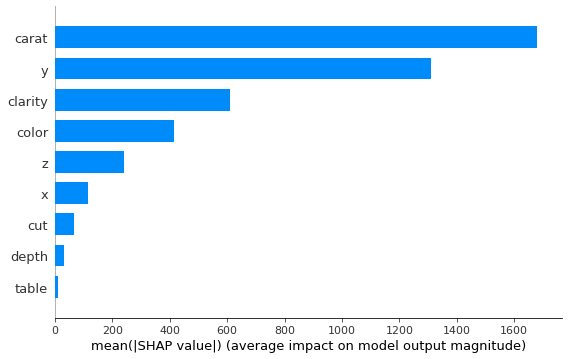

In [10]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

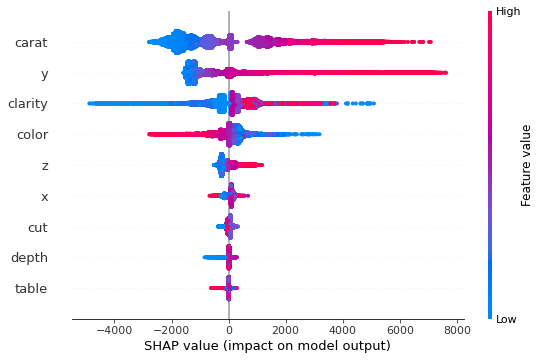

In [11]:
shap.summary_plot(shap_values, X_train)

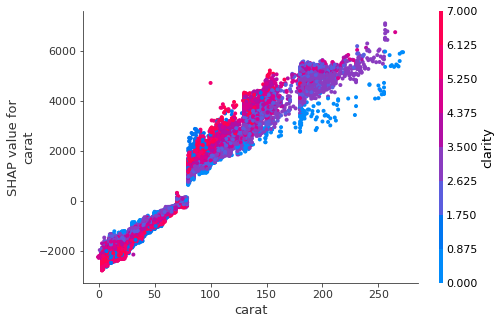

In [15]:
shap.dependence_plot('carat', shap_values, X_train)

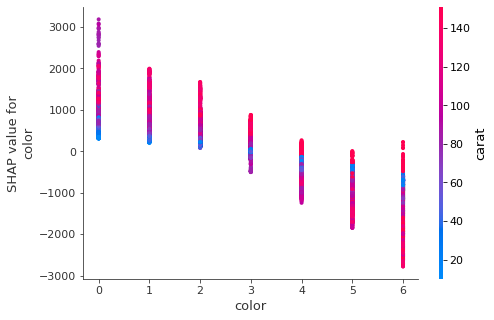

In [16]:
shap.dependence_plot('color', shap_values, X_train)

In [27]:
shap_explainer_values=explainer(X_train)

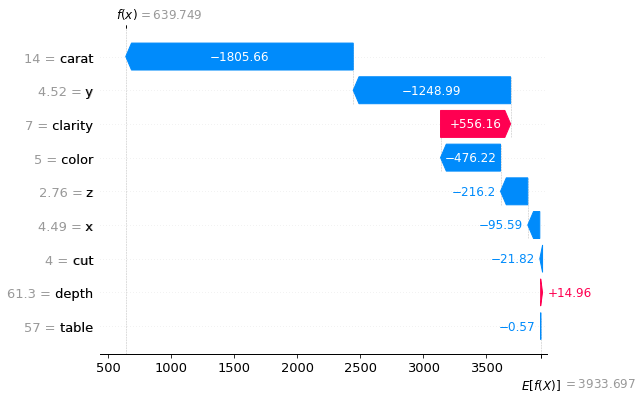

In [24]:
shap.waterfall_plot(shap_explainer_values[5059])

In [28]:
!kaggle datasets download -d ukveteran/professor-salaries

/usr/bin/sh: 1: kaggle: not found


In [53]:
import pandas as pd
data=pd.read_csv('Salaries.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
for col in data.columns:
    if data[col].dtype=='object':
        data[col]=data[col].astype('category')
X,y=data.drop('salary',axis=1),data['salary']
X.shape

(397, 5)

In [50]:
data

rank  discipline  yrs.since.phd  yrs.service  sex  salary
0       2           1             19           18    1  139750
1       2           1             20           16    1  173200
2       1           1              4            3    1   79750
3       2           1             45           39    1  115000
4       2           1             40           41    1  141500
..    ...         ...            ...          ...  ...     ...
392     2           0             33           30    1  103106
393     2           0             31           19    1  150564
394     2           0             42           25    1  101738
395     2           0             25           15    1   95329
396     1           0              8            4    1   81035

[397 rows x 6 columns]

In [54]:
# lightgbm regression
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.1,n_estimators=10)
lgbm.fit(X,y)
y_pred=lgbm.predict(X)
print('MAE:',mean_absolute_error(y,y_pred))
print('MSE:',mean_squared_error(y,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y,y_pred)))

MAE: 17919.244921662743
MSE: 542209636.6004888
RMSE: 23285.39534988592


In [55]:
%%time
import shap
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X)

CPU times: user 11.3 ms, sys: 0 ns, total: 11.3 ms
Wall time: 17.2 ms


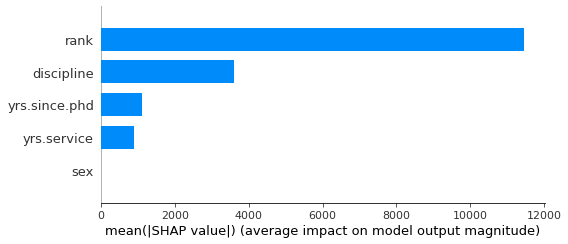

In [56]:
shap.summary_plot(shap_values, X, plot_type="bar")

<AxesSubplot:>

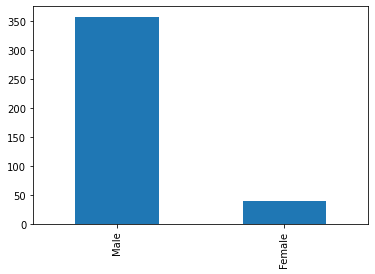

In [58]:
data['sex'].value_counts().plot(kind='bar')